# Sobre o notebook

A "hora da prática" é uma atividade do curso de Data Visualization: gráficos de comparação e distribuição da Alura para a escrita e teste dos códigos dos diversos desafios envolvendo os aprendizados de cada aula.

O notebook "hora da prática" é um notebook construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

## Aula 01 - Comparando dados

Vamos praticar a criação de gráficos de comparação (colunas e barras) que aprendemos até aqui. Para a prática, vamos seguir utilizando o conjunto de dados do relatório de vendas das lojas de departamentos de 2016 a 2019 que está disponível no [github do projeto](https://github.com/alura-cursos/dataviz-graficos/blob/master/dados/relatorio_vendas.csv).

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

Desafio 1: Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

Desafio 2: Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

### Desafio 1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv'

vendas = pd.read_csv(url)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_pedido          8940 non-null   object 
 1   data_envio           8940 non-null   object 
 2   modo_envio           8940 non-null   object 
 3   nome_cliente         8940 non-null   object 
 4   segmento_cliente     8940 non-null   object 
 5   cidade               8940 non-null   object 
 6   estado               8940 non-null   object 
 7   regiao               8940 non-null   object 
 8   departamento         8940 non-null   object 
 9   tipo_produto         8940 non-null   object 
 10  preco_base           8940 non-null   float64
 11  preco_unit_sem_desc  8940 non-null   float64
 12  desconto             8940 non-null   float64
 13  preco_unit_venda     8940 non-null   float64
 14  quantidade           8940 non-null   int64  
 15  vendas               8940 non-null   f

In [4]:
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format ='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format ='%Y-%m-%d')
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [5]:
vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [6]:
vendas['ano'] = vendas['data_pedido'].dt.year

In [7]:
df_grafico = vendas.groupby('ano').sum('lucro')
df_grafico = df_grafico[['lucro']]
df_grafico

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


<ipython-input-8-490408a2f3fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_grafico, x= df_grafico.index , y = 'lucro', palette= cores)


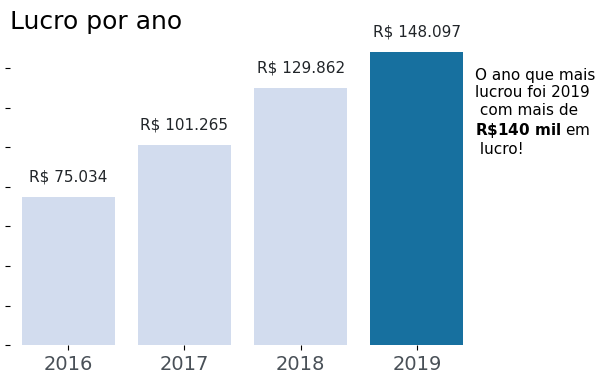

In [8]:
cores = [AZUL5, AZUL5, AZUL5, AZUL2]
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.barplot(data = df_grafico, x= df_grafico.index , y = 'lucro', palette= cores)
ax.set_title('Lucro por ano', fontsize = 18, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
sns.despine( left = True, bottom = True)

ax.text(3.5,14e4,'O ano que mais\nlucrou foi 2019\n com mais de\n$\\bf{R\$ 140\ mil}$ em\n lucro!', va = 'top', fontsize = 11)

ax.set_yticklabels([])
for i, valor in enumerate(df_grafico['lucro']):
  qtd = f'R$ {valor:,.0f}'.replace(',','.')
  offset = 1e4
  ax.text(i, valor + offset, qtd , fontsize = 11, color= CINZA1, ha = 'center', va = 'center')

plt.show()


### Desafio 2

In [9]:
df_grafico_top10 = vendas.groupby('tipo_produto').sum('vendas').sort_values('vendas', ascending= False)[:10]
df_grafico_top10

,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro,ano
tipo_produto,,,,,,,,
pneus,259074.83,300810.91,61.800,277894.04,2968,1022428.97,67460.05,1612163
ferramentas,249495.99,282089.66,46.300,259104.82,2095,995158.41,41020.34,1099647
vasos,176087.87,190809.34,28.000,184595.65,2892,696044.18,33941.85,1553651
ferramentas de jardinagem,159812.14,201445.86,250.000,178275.52,5322,648879.72,53202.88,2742125
materiais de revestimento,166561.76,180684.05,37.850,158618.23,1126,629656.36,-28869.01,579072
equipamentos de limpeza,142497.25,165020.39,15.950,144072.23,407,542304.58,8724.39,215886
ferramentas automotivas,112509.45,133267.65,26.400,129108.19,2560,502109.29,63330.22,1357954
peças de reposição,108696.57,142750.86,5.100,133176.26,216,486907.94,91148.67,127118
encanamentos,96417.20,105404.86,22.235,95502.78,803,373223.88,-5622.34,417680


In [10]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

<ipython-input-11-bd1260cb0a25>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_grafico_top10, x= 'vendas', y = df_grafico_top10.index, palette = cores)


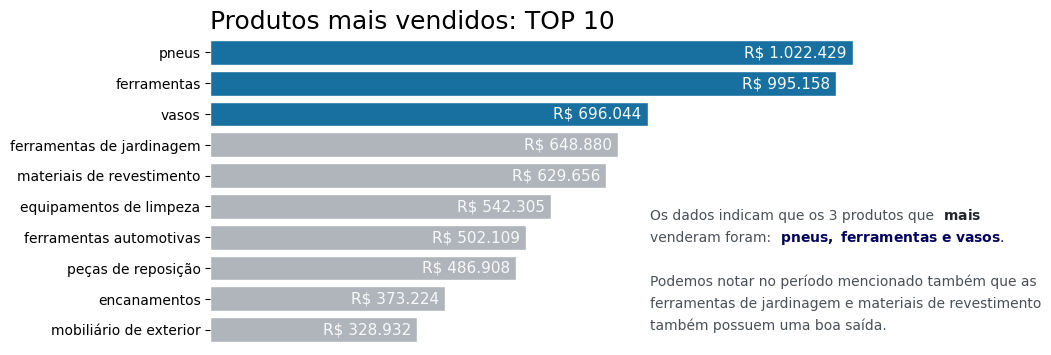

In [11]:
cores = [AZUL2, AZUL2, AZUL2, CINZA3, CINZA3, CINZA3, CINZA3, CINZA3, CINZA3, CINZA3]

fig, ax = plt.subplots(figsize = (10,4))
fig.subplots_adjust(right=0.8)
sns.set_theme(style= 'white')
ax = sns.barplot(data = df_grafico_top10, x= 'vendas', y = df_grafico_top10.index, palette = cores)
ax.set_title('Produtos mais vendidos: TOP 10', fontsize = 18, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
sns.despine( left = True, bottom = True)

for i, valor in enumerate(df_grafico_top10['vendas']):
  qtd = f'R$ {valor:,.0f}'.replace(',','.')
  offset = 1e4
  ax.text(valor - offset ,i , qtd, fontsize = 11, va = 'center', ha = 'right', color = CINZA5)

texto_colorido(
    7e5, 9,                                                      # coordenadas
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL1],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

plt.show()

## Aula 02 - Agrupando dados

Vamos praticar a criação de gráficos de comparação representando os valores agrupados por colunas e/ou barras. Para esse desafio, vamos seguir utilizando o conjunto de dados do relatório de vendas das lojas de departamentos de 2016 a 2019 que está disponível no [github do projeto](https://github.com/alura-cursos/dataviz-graficos/blob/master/dados/relatorio_vendas.csv).

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos abaixo:

Desafio 1: Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

Desafio 2: Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

### Desafio 1

In [12]:
df_vendas = vendas.copy()
df_vendas = df_vendas.query('(ano == 2017 or ano == 2018)')
df_vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro,ano
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26,2018
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29,2018
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68,2018
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15,2017
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2018-09-23,2018-09-29,Entrega padrão,Fernando da Cunha,B2C,Crato,Ceará,Nordeste,Jardinagem e paisagismo,pesticidas,13.21,17.27,0.000,17.27,7,120.89,28.42,2018
8932,2018-09-23,2018-09-29,Entrega padrão,Fernando da Cunha,B2C,Crato,Ceará,Nordeste,Automotivo,pneus,143.24,166.56,0.000,166.56,2,333.12,46.64,2018
8933,2017-05-18,2017-05-24,Entrega padrão,Alexandre Barbosa,B2C,Natal,Rio Grande do Norte,Nordeste,Jardinagem e paisagismo,sementes,8.14,10.71,0.000,10.71,10,107.10,25.70,2017
8934,2017-05-18,2017-05-24,Entrega padrão,Alexandre Barbosa,B2C,Natal,Rio Grande do Norte,Nordeste,Jardinagem e paisagismo,materiais de paisagismo,40.41,47.26,0.000,47.26,4,189.04,27.40,2017


In [13]:
df_vendas_cross = pd.crosstab(index = df_vendas['ano'], columns= df_vendas['estado'][df_vendas['regiao']=='Centro-Oeste'], values = df_vendas['vendas'], aggfunc = 'sum')
df_vendas_cross

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


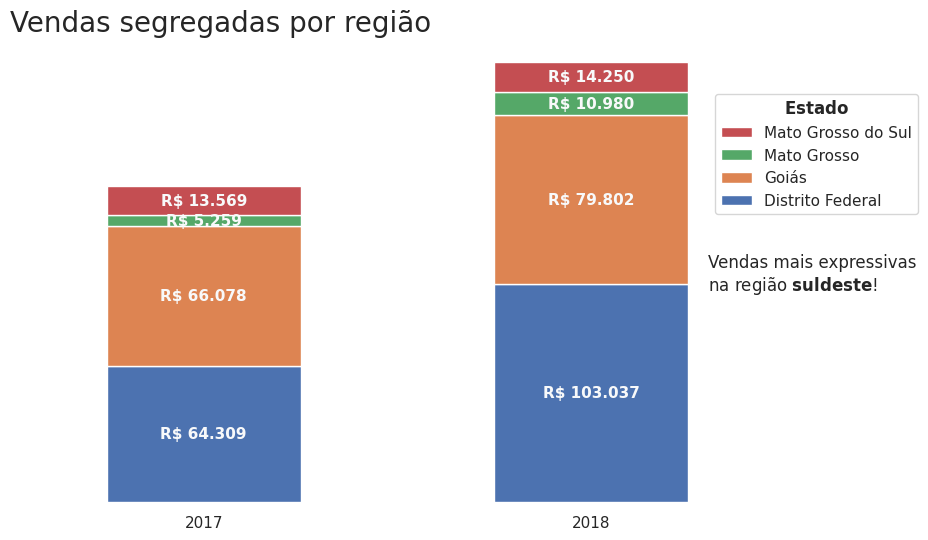

In [14]:
ax = df_vendas_cross.plot(kind = 'bar', figsize = (10,6), stacked= True)

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(rotation=0)
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_title('Vendas segregadas por região', size= 20, loc = 'left')

ax.text(1.3, 1e5, 'Vendas mais expressivas\nna região $\\bf{suldeste}$!')

ax.legend(loc='best', bbox_to_anchor=(0.9,0.9), title= "$\\bf{Estado}$", reverse=True)

for container in ax.containers:
  label= [f'R$ {valor.get_height():,.0f}'.replace(',','.') for valor in container]
  ax.bar_label(container, labels = label, fontsize = 11 , color = CINZA5, label_type= 'center', fontweight = 'bold')


#### Feito pelo professor

In [15]:
# Importando as bibliotecas
import pandas as pd

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido','regiao', 'estado', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
vendas_co['ano'] = vendas_co.data_pedido.dt.year

# Selecionando apenas os dados do Centro-Oeste dos anos de 2017 e 2018 e removendo as colunas de data_pedido e região
vendas_co = vendas_co.query("regiao == 'Centro-Oeste' and (ano == 2017 or ano == 2018)")
vendas_co.drop(labels = ["data_pedido","regiao"], axis = 1, inplace = True)

vendas_co


,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [16]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por estado
vendas_co_ano = pd.crosstab(index = vendas_co.ano, columns = vendas_co.estado,
                         values = vendas_co.vendas, aggfunc = "sum")

vendas_co_ano


estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


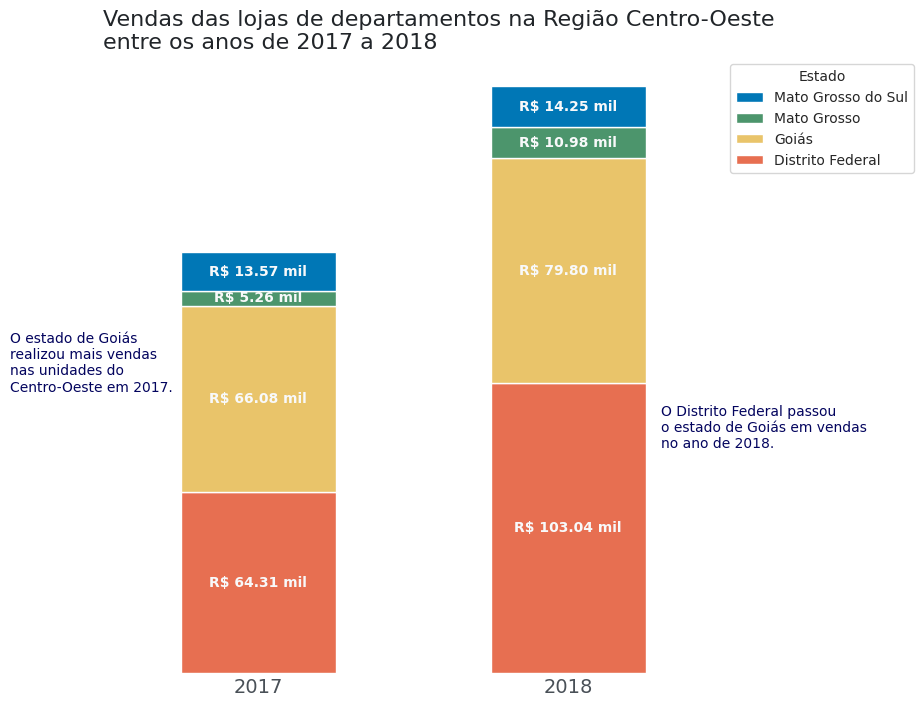

In [17]:
# Definindo as cores do gráfico
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gerando o gráfico de colunas empilhadas
ax = vendas_co_ano.plot(kind="bar", stacked=True, figsize=(8,8), color = cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018',
             loc='left', fontsize=16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis="both", which ="both", length=0)

# Anotando uma conclusão no gráfico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title= "Estado", title_fontsize = 10, fontsize = 10)

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(",",".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

fig = ax.get_figure()


### Desafio 2

In [18]:
vendas.head()
df_venda2 = vendas.copy()
df_venda2

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [19]:
df_dep_cross = pd.crosstab(index = df_venda2['modo_envio'], columns = df_venda2['departamento'], values = df_venda2['vendas'], aggfunc= 'sum')[['Automotivo','Jardinagem e paisagismo', 'Materiais de construção']]
df_dep_cross.sort_index()
df_dep_cross

departamento,Automotivo,Jardinagem e paisagismo,Materiais de construção
modo_envio,,,
24 horas,184631.11,94752.22,120613.74
Econômica,449248.12,508777.43,489610.40
Entrega padrão,1478003.81,1336159.29,1318859.15
Envio rápido,441867.74,314291.65,344184.89


In [20]:
df_dep_cross_perc = pd.crosstab(index = df_venda2['modo_envio'], columns = df_venda2['departamento'], values = df_venda2['vendas'], aggfunc= 'sum', normalize= 'index')
df_dep_cross_perc.sort_index()
df_dep_cross_perc

departamento,Automotivo,Jardinagem e paisagismo,Materiais de construção
modo_envio,,,
24 horas,0.461581,0.236882,0.301537
Econômica,0.310332,0.351454,0.338214
Entrega padrão,0.357608,0.323289,0.319103
Envio rápido,0.401572,0.285630,0.312797


In [21]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [22]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


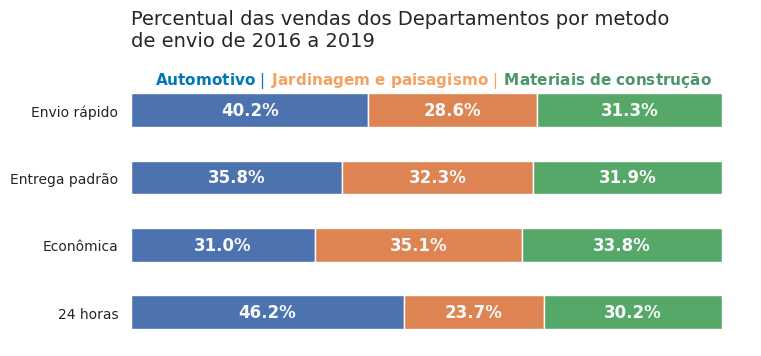

In [23]:
ax = df_dep_cross_perc.plot(kind= 'barh', stacked=True,legend= None, figsize=(8,3.5))

ax.set_title('Percentual das vendas dos Departamentos por metodo\nde envio de 2016 a 2019\n', loc='left', size = 14)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, color = CINZA3)
ax.set_frame_on(False)

texto_colorido(0.04,3.39, '$\\bf{Automotivo}$ | ||$\\bf{\ Jardinagem\ e\ paisagismo}$ | ||$\\bf{\ Materiais\ de\ construção}$',
               esp= 22, ax=ax, cores= [[AZUL2, LARANJA1, VERDE1]], fontsize=11)

for container in ax.containers:
  label = [f'{valor.get_width()*100:.1f}%'for valor in container]
  ax.bar_label(container, labels= label, label_type = 'center', color = CINZA5, fontweight = 'bold')

#### Feito pelo professor

In [24]:
# Importando as bibliotecas
import pandas as pd

# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Criando um df com os dados desejados
df_depart = vendas.copy()
df_depart = df_depart[['departamento','modo_envio']]

## Criando uma tabela cruzada (crosstab) com a frequência de modos de envio por departamento
df_depart = pd.crosstab(index = df_depart.departamento, columns = df_depart.modo_envio, normalize = "index")

df_depart


modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [25]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


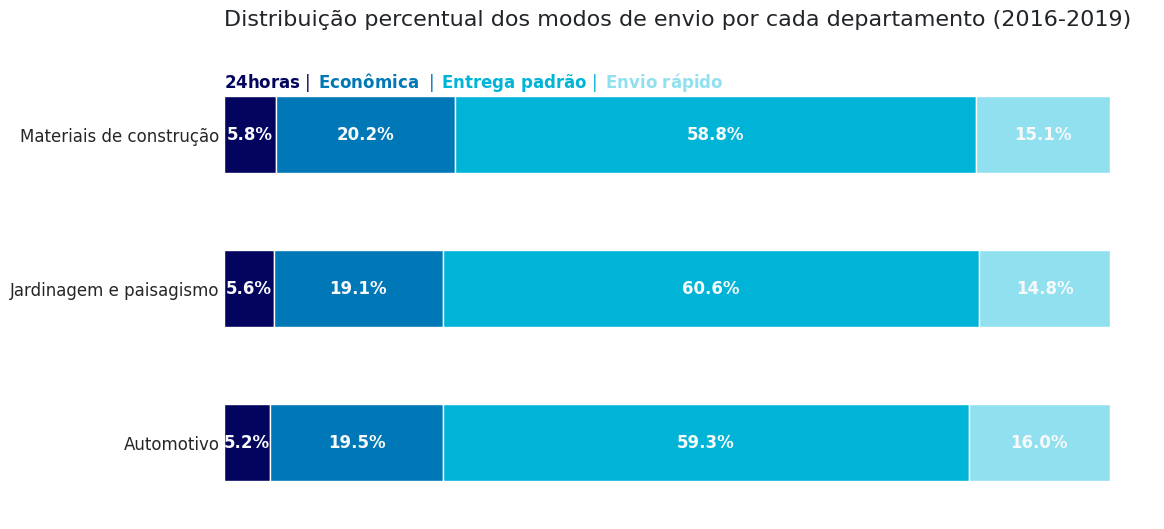

In [26]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico de barras empilhadas
ax = df_depart.plot(kind="barh", stacked=True, figsize=(12,6), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n",
             fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# Valores das barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()


## Aula 03 - Séries de tempo

Vamos praticar a criação de gráficos de séries de tempo. Para a prática, vamos seguir utilizando o conjunto de dados do relatório de vendas das lojas de departamentos de 2016 a 2019 que está disponível no github do projeto.

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

Desafio 1: Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.

Dica: Para agrupar os dados por semestre você pode utilizar a função resample da seguinte forma: resample(“2Q”, closed = “left”)

Desafio 2: Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

Sugestão: No Desafio 2, utilize o Plotly para possibilitar ao usuário a escolha entre linhas que deseja visualizar.

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

### Desafio 1

In [27]:
vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [28]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_pedido          8940 non-null   object 
 1   data_envio           8940 non-null   object 
 2   modo_envio           8940 non-null   object 
 3   nome_cliente         8940 non-null   object 
 4   segmento_cliente     8940 non-null   object 
 5   cidade               8940 non-null   object 
 6   estado               8940 non-null   object 
 7   regiao               8940 non-null   object 
 8   departamento         8940 non-null   object 
 9   tipo_produto         8940 non-null   object 
 10  preco_base           8940 non-null   float64
 11  preco_unit_sem_desc  8940 non-null   float64
 12  desconto             8940 non-null   float64
 13  preco_unit_venda     8940 non-null   float64
 14  quantidade           8940 non-null   int64  
 15  vendas               8940 non-null   f

In [29]:
df_semestre = vendas.copy()
df_semestre['data_pedido'] = pd.to_datetime(df_semestre['data_pedido'], format = '%Y-%m-%d')
df_semestre = df_semestre[df_semestre['estado'] == 'São Paulo']
df_semestre.set_index('data_pedido', inplace= True)
df_semestre = df_semestre.resample('2Q', closed = 'left').agg('sum', numeric_only=True)
df_semestre = df_semestre.reset_index()
df_sp_sem = df_semestre[["data_pedido", "vendas"]]
df_sp_sem.vendas =  round(df_sp_sem.vendas/1000,2)


<ipython-input-29-f837af577917>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp_sem.vendas =  round(df_sp_sem.vendas/1000,2)


In [30]:
vendas_max = df_sp_sem.vendas.max()
vendas_min = df_sp_sem.vendas.min()
valores = df_sp_sem.vendas.values

<ipython-input-31-18f661405def>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(["1º Sem\n2016", "2º Sem\n2016", "1º Sem\n2017", "2º Sem\n2017",
<ipython-input-31-18f661405def>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['R$ 0 mil','R$ 0 mil', 'R$ 100 mil', 'R$ 200 mil', 'R$ 300 mil' , 'R$ 400 mil', 'R$ 500 mil'])


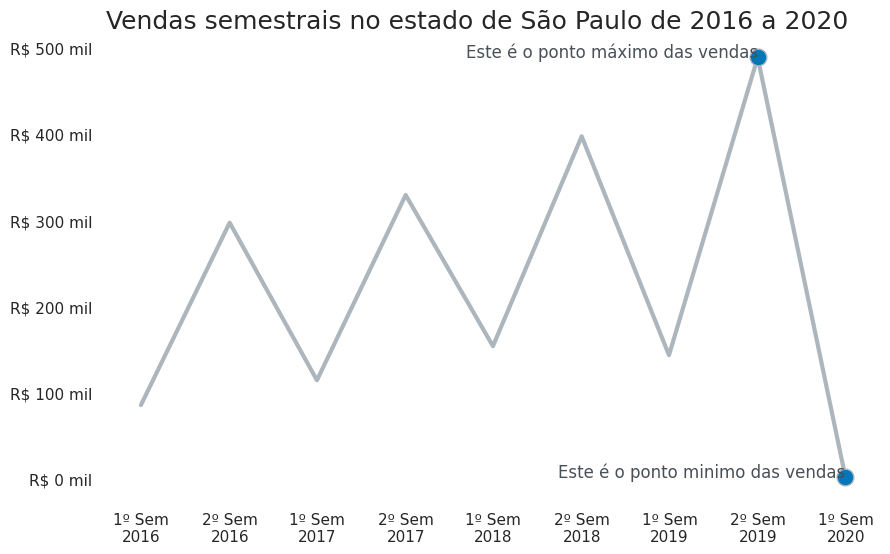

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,6));

pontos_a_marcar = list((valores == vendas_min) | (valores == vendas_max))

ax.plot(df_sp_sem['data_pedido'],
        df_sp_sem['vendas'],
        marker = 'o',
        lw = 3,
        color = CINZA3,
        markevery= pontos_a_marcar,
        markersize = 12,
        markerfacecolor = AZUL2,)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Vendas semestrais no estado de São Paulo de 2016 a 2020', fontsize = 18, loc= 'left')
ax.xaxis.set_ticklabels(["1º Sem\n2016", "2º Sem\n2016", "1º Sem\n2017", "2º Sem\n2017",
          "1º Sem\n2018", "2º Sem\n2018", "1º Sem\n2019", "2º Sem\n2019","1º Sem\n2020"])

ax.yaxis.set_ticklabels(['R$ 0 mil','R$ 0 mil', 'R$ 100 mil', 'R$ 200 mil', 'R$ 300 mil' , 'R$ 400 mil', 'R$ 500 mil'])

ax.set_frame_on(False)

for x, y in zip(df_sp_sem.data_pedido, df_sp_sem.vendas):
  if y == vendas_min:
    ax.text(x, y, 'Este é o ponto minimo das vendas', size = 12, color = CINZA2, ha = 'right')
  if y == vendas_max:
    ax.text(x , y, 'Este é o ponto máximo das vendas', size = 12, color = CINZA2, ha = 'right', transform = ax.transData)


plt.show()

### Desafio 2

In [32]:
# Importando as bibliotecas
import pandas as pd
import plotly.express as px

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_ne = vendas.copy()
df_ne = df_ne.query("regiao == 'Nordeste'")[["estado","data_pedido", "lucro"]]


In [33]:
# Criando uma tabela cruzada (crosstab) com os valores de lucro por dia por estado
df_estados_ne = pd.crosstab(index = df_ne.data_pedido, columns = df_ne.estado, values = df_ne.lucro, aggfunc="sum")

# Agrupando os lucros por ano
df_estados_ne = df_estados_ne.resample('Y').agg('sum')
df_estados_ne = round(df_estados_ne/1e3, 2)
df_estados_ne


estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [34]:
# Importando a biblioteca
import plotly.express as px

# Gerando um gráfico de linha com os lurcos das lojas por ano dividido por estado da região nordeste
fig = px.line(df_estados_ne, x=df_estados_ne.index, y=df_estados_ne.columns, markers = True, labels={"estado": "Estados"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3, AZUL5, LARANJA1, CINZA1, AZUL4])

# Ajustando o layout do gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Lucros das lojas de departamentos por ano na Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

# Ajustando os ticks do eixo y para o formato em milhar
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

# Ajustando o eixo x com os labels dos anos
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=df_estados_ne.index)

# Dados ao passar o mouse (hover)
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}")

fig.show()


## Aula 04 - Distribuindo dados

### Desafio 1

Vamos praticar a criação de gráficos de distribuição de dados. Para esse desafio, vamos trabalhar com duas base de dados diferentes: a primeira será um dataset com as idades de uma amostra da população do município de Cidade Alegre, cidade fictícia que utilizamos em uma de nossas atividades, e a segunda será o dataset dos volumes do amaciante que utilizamos durante essa aula, que está disponível no github do projeto.

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

Desafio 1: Baixe a base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

Dica 1: Para desenhar os gráficos separados, utilize a mesma ideia que executamos no gráfico de barras empilhadas: fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(largura, altura)).

Dica 2: E, para desenhar 2 ou mais gráficos no seaborn, precisamos passar um parâmetro ax para a função de desenho do visual, por exemplo, sns.barplot(ax = axs[0], …)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
pop_idade = pd.read_csv('/content/pop_idade.csv')
pop_idade

,idade
0,39
1,33
2,41
3,50
4,32
...,...
495,40
496,24
497,33
498,26


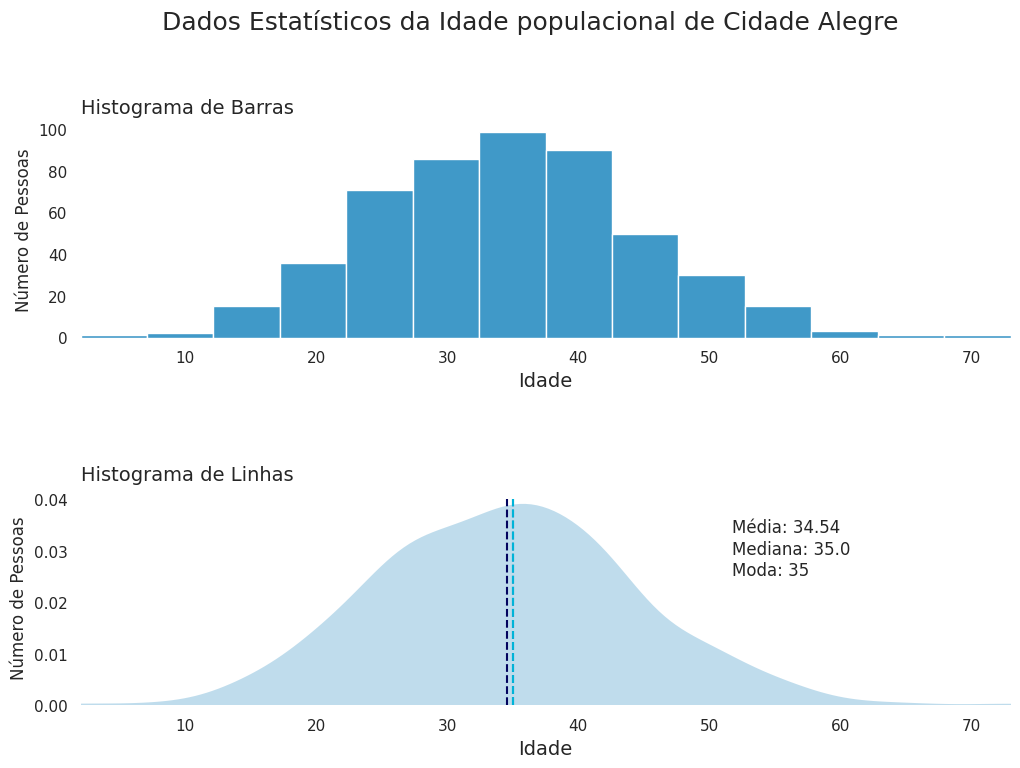

In [92]:
fig, ax  = plt.subplots(2,1, figsize= (12,8))
sns.set_theme(style="white")
fig.subplots_adjust(hspace=0.7, wspace=0.7, top = 0.84)
fig.suptitle('Dados Estatísticos da Idade populacional de Cidade Alegre', fontsize = 18)

ax[0] = sns.histplot(data= pop_idade, x='idade', binwidth= 5 , color = AZUL2, ax = ax[0])
ax[0].set_title('Histograma de Barras', fontsize= 14, loc= 'left')
ax[0].set_xlim(pop_idade.idade.min(),pop_idade.idade.max())
ax[0].set_ylabel('Número de Pessoas')
ax[0].set_xlabel('Idade', size=14)
ax[0].set_frame_on(False)

ax[1] = sns.kdeplot(data= pop_idade, x='idade',lw = 0, fill = True, color = AZUL2, ax = ax[1])
ax[1].set_title('Histograma de Linhas', fontsize= 14, loc= 'left')
ax[1].set_xlim(pop_idade.idade.min(),pop_idade.idade.max())
ax[1].set_ylabel('Número de Pessoas')
ax[1].set_xlabel('Idade', size=14)
ax[1].set_frame_on(False)

estat = pop_idade.idade.mean(), pop_idade.idade.median(), pop_idade.idade.mode()[0]
desc = ['Média', 'Mediana', 'Moda']

ax[1].vlines(x = estat, ymin = 0, ymax = 0.04, colors = cores, linestyles = '--')

for i in range(len(estat)):
  ax[1].text(0.7, 0.8 - i/10, f'{desc[i]}: {estat[i]}', fontsize = 12, transform= ax[1].transAxes)

### Desafio 2
Desafio 2: Represente no boxplot dos volumes do amaciante os limites superiores e inferiores do diagrama de caixa. Comente sobre o resultado encontrado ao desenhar esses limites no boxplot.

Dica: Para conseguir definir os limites superiores e inferiores, calcule o intervalo interquartil dos dados e, logo em seguida, cada um dos limites, seguindo as fórmulas do Faça como eu fiz: elementos de um boxplot.

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

In [94]:
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv")

vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


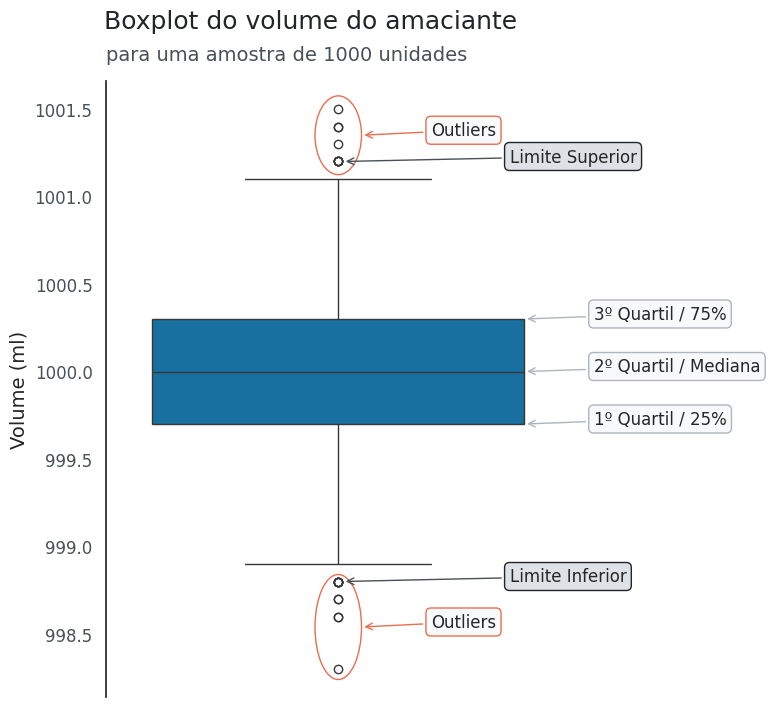

In [107]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax = sns.boxplot(data = vol_amaciante, y = 'Volume', orient = 'v', color = AZUL2 )

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.31), width = 0.1, height = 0.45, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)

# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.31), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta

ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))

ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

#desafio ... fazer os limites superiores e inferiores

IIQ = vol_amaciante.quantile(0.75) - vol_amaciante.quantile(0.25)
IIQ

limite_superior = vol_amaciante.quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante.quantile(0.25) - 1.5 * IIQ


ax.annotate('Limite Superior', xy=(0.01, limite_superior), xycoords = 'data',
             bbox=dict(boxstyle='round', fc=CINZA4, ec = CINZA1),
             xytext=(120,0), textcoords='offset points',
             arrowprops = dict(arrowstyle = '->', color=CINZA2))

ax.annotate('Limite Inferior', xy=(0.01, limite_inferior), xycoords = 'data',
             bbox=dict(boxstyle='round', fc=CINZA4, ec = CINZA1),
             xytext=(120,0), textcoords='offset points',
             arrowprops = dict(arrowstyle = '->', color=CINZA2))

plt.show()

In [102]:
limite_inferior, limite_superior

(Volume    998.8
 dtype: float64,
 Volume    1001.2
 dtype: float64)

## Aula 05 - Explorando padrões nos dados

### Desafio 1

### Desafio 2